# Contents
1. Imports
2. Checks
3. Overview
4. Average Price

# 1. Imports

In [7]:
#Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Path
path = r'/Users/davidgriesel/Documents/GitHub/202409_OGS'

In [9]:
#Dataset
df = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', '07_modelled_dataset.pkl'))

# 2. Checks

In [10]:
#Dimensions
df.shape

(32403719, 44)

In [11]:
#Preview
df.head()

,order_id,user_id,user_order_count,order_day_of_week,order_hour_of_day,days_since_last_order,is_first_order,product_id,add_to_cart_order,reordered,...,spending_score,activity_score,frequency_score,loyalty_score,loyalty_flag,region,age_profile,income_profile,parental_status,family_status
0,2539329,1,1,Monday,8,NaN,True,196,1,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
1,2539329,1,1,Monday,8,NaN,True,14084,2,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
2,2539329,1,1,Monday,8,NaN,True,12427,3,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
3,2539329,1,1,Monday,8,NaN,True,26088,4,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family
4,2539329,1,1,Monday,8,NaN,True,26405,5,0,...,1,1,1,3.0,Low Loyalty,South,Adult,Low Income,parent,Family


# 3. Overview

## 3.1. Average Price - Day of the Week - Line

In [12]:
# Calculate mean prices per day
avg_prices_dow = df.groupby('order_day_of_week', as_index=False, observed=False)['prices'].mean()
avg_prices_dow

,order_day_of_week,prices
0,Monday,7.755448
1,Tuesday,7.758648
2,Wednesday,7.757327
3,Thursday,7.763573
4,Friday,7.858335
5,Saturday,7.858536
6,Sunday,7.760793


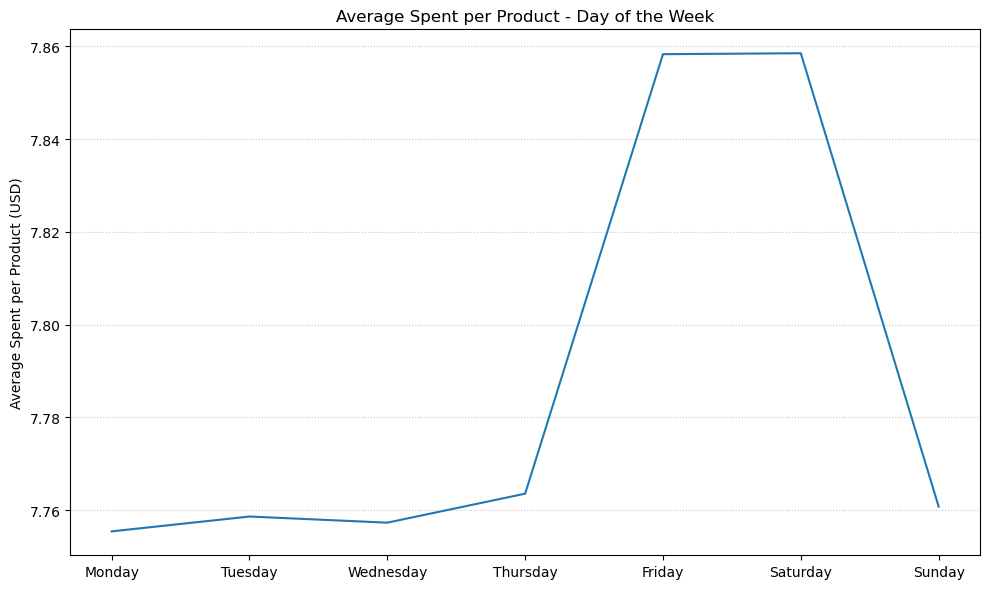

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/3.1_avg_price_dow.png


In [13]:
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices_dow, x='order_day_of_week', y='prices')

# Set the title and labels
plt.title('Average Spent per Product - Day of the Week')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '3.1_avg_price_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.2. Average Price - Hour of the Day - Line

In [14]:
# Calculate mean prices per hour
avg_prices_tod= df.groupby('order_hour_of_day', as_index=False, observed=False)['prices'].mean()
avg_prices_tod

,order_hour_of_day,prices
0,0,7.812012
1,1,7.806767
2,2,7.800565
3,3,7.829798
4,4,7.839887
5,5,7.829466
6,6,7.818757
7,7,7.820985
8,8,7.791439
9,9,7.754539


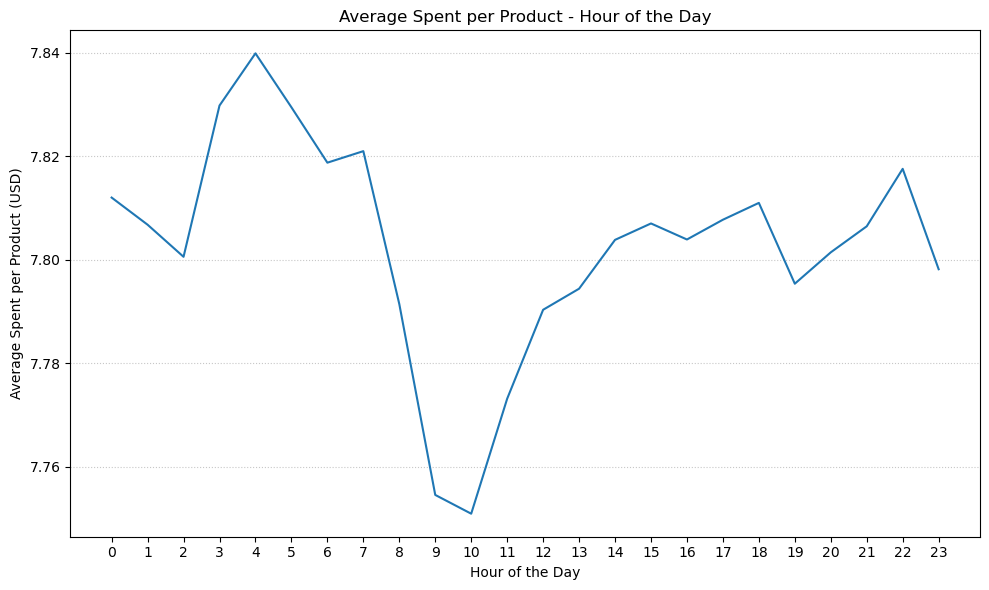

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/3.2_avg_price_hod.png


In [15]:
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices_tod, x='order_hour_of_day', y='prices')

# Set the title and labels
plt.title('Average Spent per Product - Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')

# Set x-axis ticks to show all hours from 0 to 23
plt.xticks(ticks=avg_prices_tod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '3.2_avg_price_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.3. Average Price - Hour of the Day - Multiple Lines

In [16]:
# Calculate mean prices per hour, split by day of the week
avg_prices_combined = df.groupby(['order_hour_of_day', 'order_day_of_week'], as_index=False, observed=False)['prices'].mean()
avg_prices_combined

,order_hour_of_day,order_day_of_week,prices
0,0,Monday,7.799047
1,0,Tuesday,7.777475
2,0,Wednesday,7.804008
3,0,Thursday,7.829072
4,0,Friday,7.801952
...,...,...,...
163,23,Wednesday,7.768724
164,23,Thursday,7.839701
165,23,Friday,7.837000
166,23,Saturday,7.801664


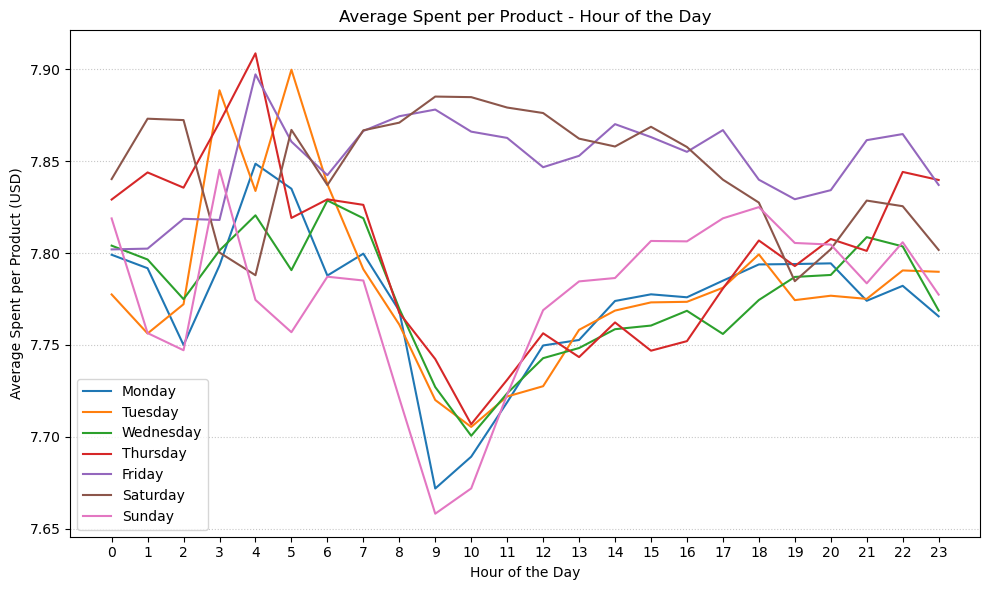

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/3.3_avg_price_todow_multi.png


In [17]:
# Create the line chart with separate lines for each day
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices_combined, x='order_hour_of_day', y='prices', hue='order_day_of_week')

# Set the title and labels
plt.title('Average Spent per Product - Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Set x-axis ticks to show all hours from 0 to 23
plt.xticks(ticks=avg_prices_tod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '3.3_avg_price_todow_multi.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.4. Average Price - Hour of the Day - Grouped Lines

In [18]:
# Calculate mean prices per hour, split by day_group
avg_prices_grouped = df.groupby(['order_hour_of_day', 'high_price_days'], as_index=False, observed=False)['prices'].mean()

# Count occurrences of each unique price
day_group_counts = avg_prices_grouped['high_price_days'].value_counts().sort_index()
day_group_counts

high_price_days
Other Days    24
Fri & Sat     24
Name: count, dtype: int64

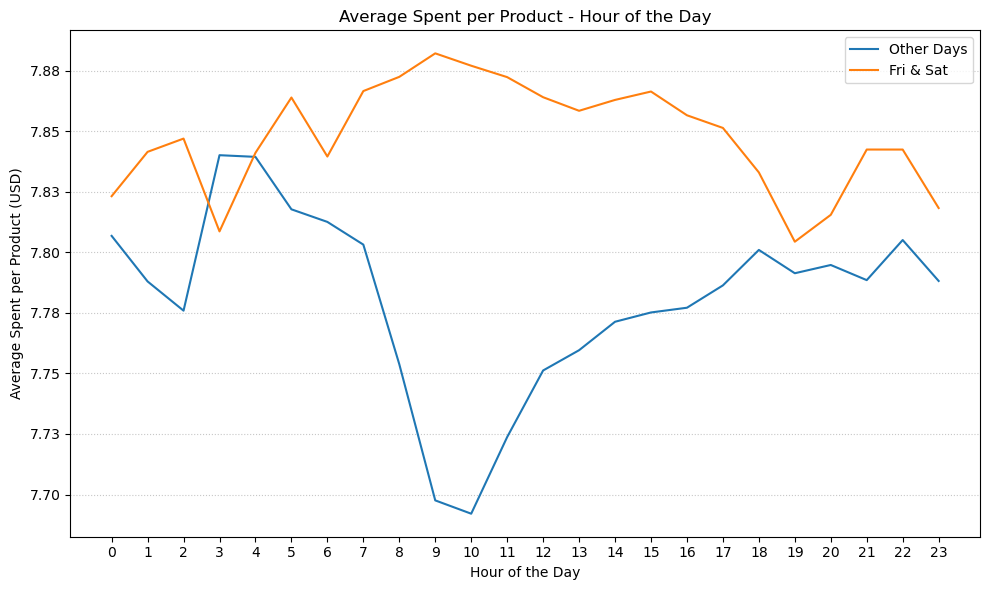

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/3.4_avg_price_todow_grouped.png


In [19]:
# Create the line chart with two lines
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices_grouped, x='order_hour_of_day', y='prices', hue='high_price_days')

# Set the title and labels
plt.title('Average Spent per Product - Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Set x-axis ticks to show all hours from 0 to 23
plt.xticks(ticks=avg_prices_tod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '3.4_avg_price_todow_grouped.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.5. Average Price - Hour of the Day - Heat Map

In [20]:
# Create a pivot table (cross-tabulation of avg prices by day and hour)
pivot_table = df.pivot_table(
    index='order_hour_of_day', 
    columns='order_day_of_week', 
    values='prices', 
    aggfunc="mean",
    observed=False 
)
pivot_table

order_day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
order_hour_of_day,,,,,,,
0,7.799047,7.777475,7.804008,7.829072,7.801952,7.840189,7.818808
1,7.791723,7.756253,7.796464,7.843801,7.802386,7.873017,7.756465
2,7.749982,7.772166,7.774912,7.835517,7.818596,7.872261,7.747138
3,7.793262,7.888471,7.801391,7.870979,7.817970,7.800260,7.845259
4,7.848551,7.833738,7.820495,7.908543,7.897110,7.787929,7.774514
5,7.834937,7.899650,7.790694,7.819063,7.860554,7.866936,7.756952
6,7.787740,7.837404,7.828549,7.829168,7.842307,7.836938,7.787118
7,7.799647,7.791161,7.818895,7.826178,7.866347,7.866692,7.785052
8,7.768589,7.761074,7.769728,7.767462,7.874356,7.870863,7.721055


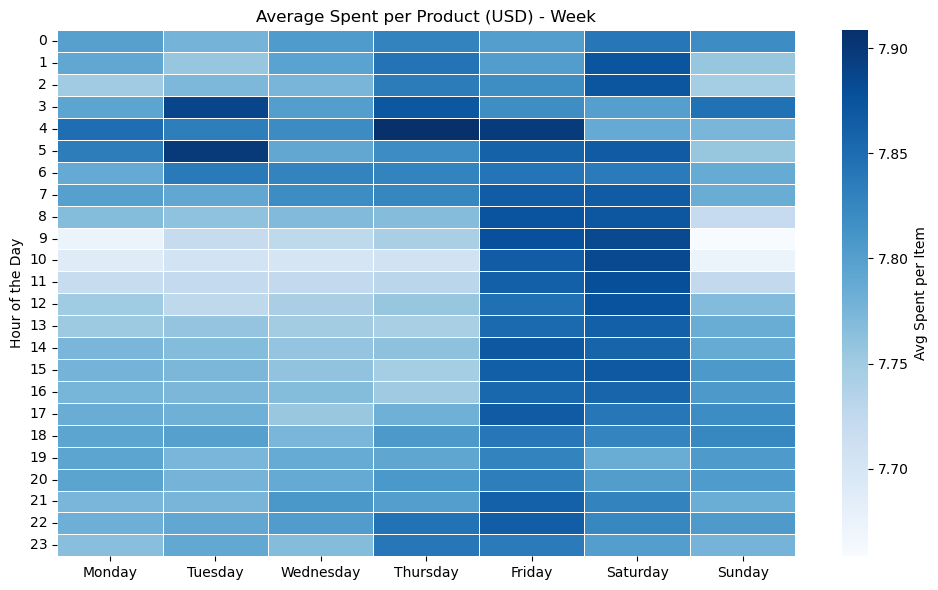

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/3.5_avg_price_todow_heat.png


In [21]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Avg Spent per Item'})

# Rotate y-axis labels
plt.yticks(rotation=0)

# Labels and title
plt.title('Average Spent per Product (USD) - Week')
plt.xlabel('')
plt.ylabel('Hour of the Day')

# Rotate y-axis labels
plt.yticks(rotation=0)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '3.5_avg_price_todow_heat.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 3.6. Average Price - Hour of the Day - Line

In [22]:
# Calculate mean prices per hour of day and week
avg_prices_todow = df.groupby('order_hour_of_day_week', as_index=False, observed=False)['prices'].mean()
avg_prices_todow

,order_hour_of_day_week,prices
0,Monday - 0,7.799047
1,Monday - 1,7.791723
2,Monday - 2,7.749982
3,Monday - 3,7.793262
4,Monday - 4,7.848551
...,...,...
163,Sunday - 19,7.805456
164,Sunday - 20,7.804580
165,Sunday - 21,7.783525
166,Sunday - 22,7.805855


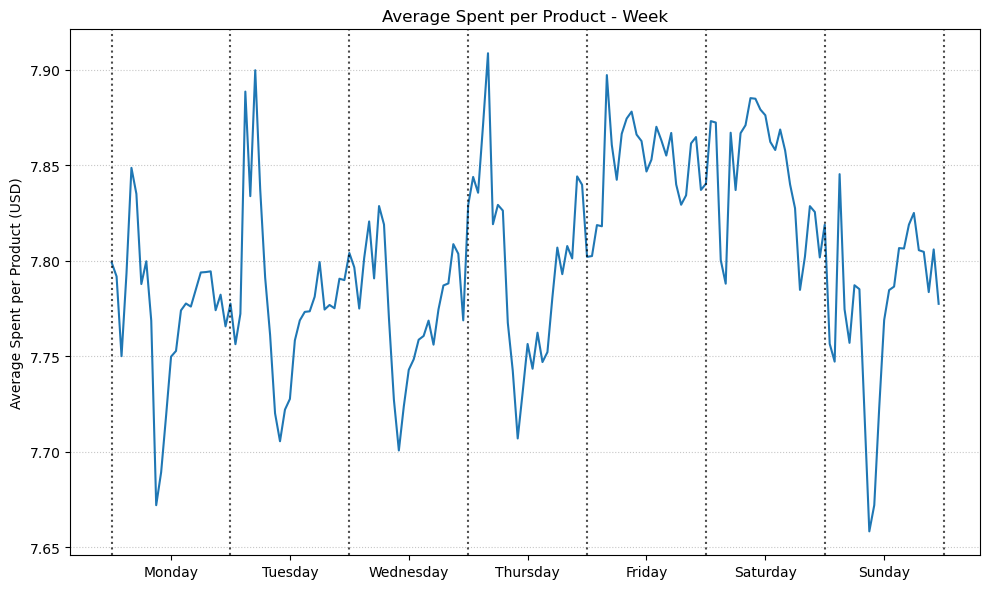

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/3.6_avg_price_todow.png


In [23]:
# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_prices_todow, x='order_hour_of_day_week', y='prices')

# Set the title and labels
plt.title('Average Spent per Product - Week')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')

# Extract day order from categorical variable
day_order = list(df['order_day_of_week'].cat.categories)

# Position the labels
day_positions = [(i * 24) + 12 for i in range(len(day_order))]  # Midpoint of each day

# Adjust x-axis labels to show only the days, centered in the middle (hour 12)
plt.xticks(ticks=day_positions, labels=day_order, rotation=0)  # Align labels to midpoints

# Format y-axis with thousands separator and 2 decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add vertical lines at the start of each day
for i in range(len(day_order) + 1):  # +1 to include the last day separator
    plt.axvline(x=i * 24, color='black', linestyle='dotted', alpha=0.7)
    
# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '3.6_avg_price_todow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

# 4. Average Price

## 4.1. Activity Flag

### 4.1.1. Profile Overview

In [24]:
# Calucalte the avg spent per item
avg_price_activity = df.groupby('activity_flag', as_index=False, observed=False)['prices'].mean()
avg_price_activity.columns = ['activity_flag', 'avg_price']
avg_price_activity

,activity_flag,avg_price
0,Low Activity,7.801627
1,Moderate Activity,7.798714
2,High Activity,7.768505


### 4.1.2. Day of Week

In [25]:
# Calculate the avg spent per item
avg_price_activity_dow = df.groupby(['order_day_of_week', 'activity_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_activity_dow

,order_day_of_week,activity_flag,prices
0,Monday,Low Activity,7.766728
1,Monday,Moderate Activity,7.758481
2,Monday,High Activity,7.737862
3,Tuesday,Low Activity,7.763946
4,Tuesday,Moderate Activity,7.765128
5,Tuesday,High Activity,7.741677
6,Wednesday,Low Activity,7.756987
7,Wednesday,Moderate Activity,7.763720
8,Wednesday,High Activity,7.746347
9,Thursday,Low Activity,7.787568


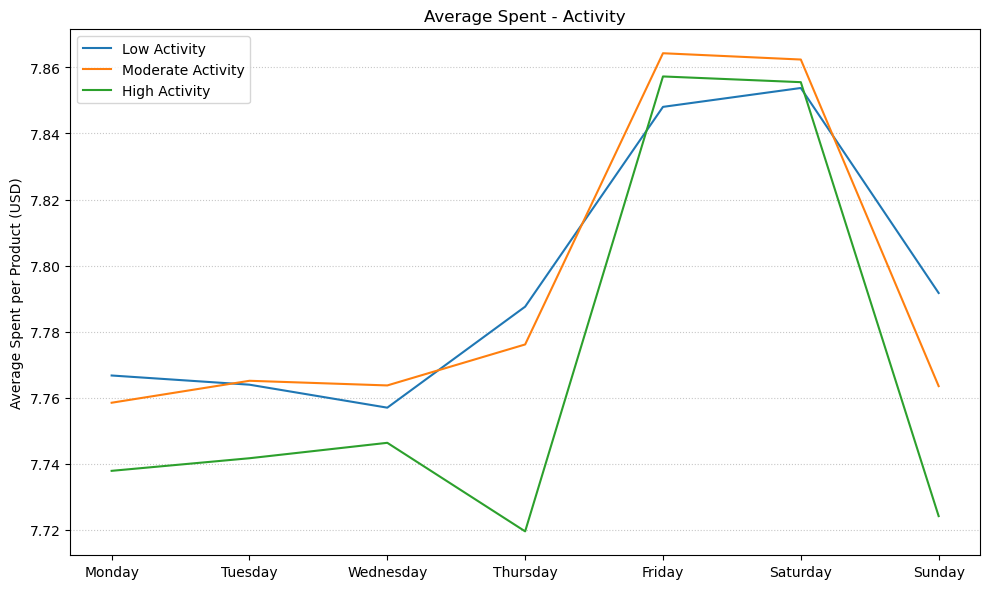

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.1.2_avg_price_activity_dow.png


In [26]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_activity_dow, x='order_day_of_week', y='prices', hue='activity_flag')

# Formatting
plt.title('Average Spent - Activity')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.1.2_avg_price_activity_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.1.3. Hour of Day

In [27]:
# Calculate the avg spent per item
avg_price_activity_hod = df.groupby(['order_hour_of_day', 'activity_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_activity_hod

,order_hour_of_day,activity_flag,prices
0,0,Low Activity,7.809320
1,0,Moderate Activity,7.818740
2,0,High Activity,7.799870
3,1,Low Activity,7.830707
4,1,Moderate Activity,7.828097
...,...,...,...
67,22,Moderate Activity,7.826589
68,22,High Activity,7.827547
69,23,Low Activity,7.769711
70,23,Moderate Activity,7.813974


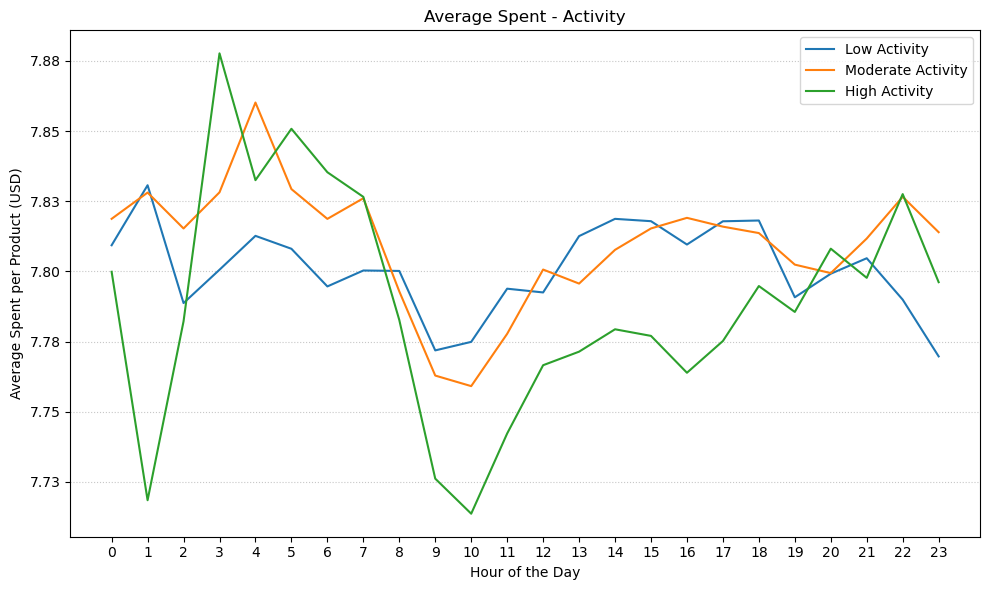

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.1.3_avg_price_activity_hod.png


In [28]:
# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_activity_hod, x='order_hour_of_day', y='prices', hue='activity_flag')

# Formatting
plt.title('Average Spent - Activity')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_activity_hod['order_hour_of_day'].unique(), labels=avg_price_activity_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.1.3_avg_price_activity_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.2. Spending Flag

### 4.2.1. Profile Overview

In [29]:
# Calucalte the avg spent per item per profile
avg_price_spending = df.groupby('spending_flag', as_index=False, observed=False)['prices'].mean()
avg_price_spending.columns = ['speding_flag', 'avg_price']
avg_price_spending

,speding_flag,avg_price
0,Low Spender,6.880504
1,Moderate Spender,7.809698
2,High Spender,8.603219
3,Premium Spender,9.964296


### 4.2.2. Day of Week

In [30]:
# Calculate the avg spent per item
avg_price_spending_dow = df.groupby(['order_day_of_week', 'spending_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_spending_dow

,order_day_of_week,spending_flag,prices
0,Monday,Low Spender,6.846026
1,Monday,Moderate Spender,7.803978
2,Monday,High Spender,8.600572
3,Monday,Premium Spender,10.016388
4,Tuesday,Low Spender,6.855469
5,Tuesday,Moderate Spender,7.799127
6,Tuesday,High Spender,8.599062
7,Tuesday,Premium Spender,9.996328
8,Wednesday,Low Spender,6.845922
9,Wednesday,Moderate Spender,7.793901


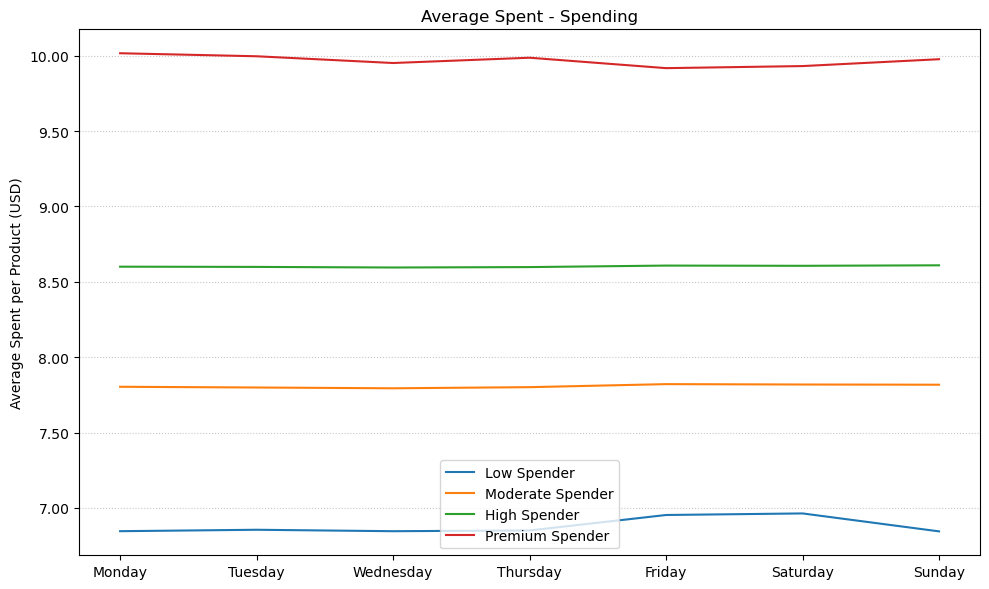

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.2.2_avg_price_spending_dow.png


In [31]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_spending_dow, x='order_day_of_week', y='prices', hue='spending_flag')

# Formatting
plt.title('Average Spent - Spending')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.2.2_avg_price_spending_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.2.3. Hour of Day

In [32]:
# Calculate the avg spent per item
avg_price_spending_hod = df.groupby(['order_hour_of_day', 'spending_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_spending_hod

,order_hour_of_day,spending_flag,prices
0,0,Low Spender,6.927355
1,0,Moderate Spender,7.797517
2,0,High Spender,8.580959
3,0,Premium Spender,10.043714
4,1,Low Spender,6.910847
...,...,...,...
91,22,Premium Spender,10.000725
92,23,Low Spender,6.911413
93,23,Moderate Spender,7.808041
94,23,High Spender,8.574353


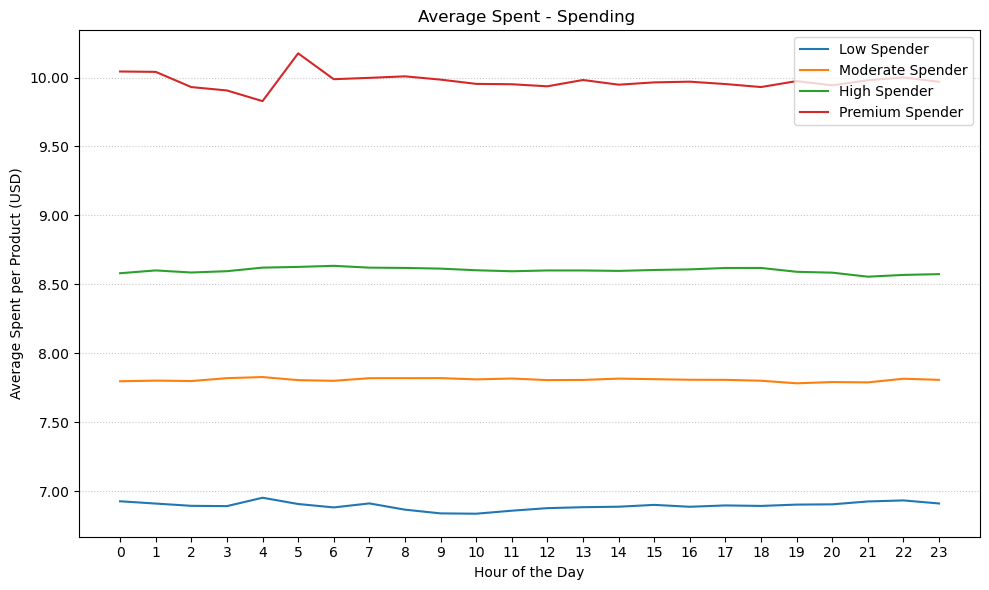

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.2.3_avg_price_spending_hod.png


In [33]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_spending_hod, x='order_hour_of_day', y='prices', hue='spending_flag')

# Formatting
plt.title('Average Spent - Spending ')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_spending_hod['order_hour_of_day'].unique(), labels=avg_price_spending_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.2.3_avg_price_spending_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.3. Frequency Flag

### 4.3.1. Profile Overview

In [34]:
# Calucalte the avg spent per item per profile
avg_price_frequency = df.groupby('frequency_flag', as_index=False, observed=False)['prices'].mean()
avg_price_frequency.columns = ['frequency_flag', 'avg_price']
avg_price_frequency

,frequency_flag,avg_price
0,Rare Shopper,7.786636
1,Occasional Shopper,7.787947
2,Frequent Shopper,7.802115


### 4.3.2. Days of Week

In [35]:
# Calculate the avg spent per item
avg_price_frequency_dow = df.groupby(['order_day_of_week', 'frequency_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_frequency_dow

,order_day_of_week,frequency_flag,prices
0,Monday,Rare Shopper,7.742495
1,Monday,Occasional Shopper,7.748800
2,Monday,Frequent Shopper,7.773433
3,Tuesday,Rare Shopper,7.736721
4,Tuesday,Occasional Shopper,7.760799
5,Tuesday,Frequent Shopper,7.770720
6,Wednesday,Rare Shopper,7.736244
7,Wednesday,Occasional Shopper,7.749159
8,Wednesday,Frequent Shopper,7.779884
9,Thursday,Rare Shopper,7.768487


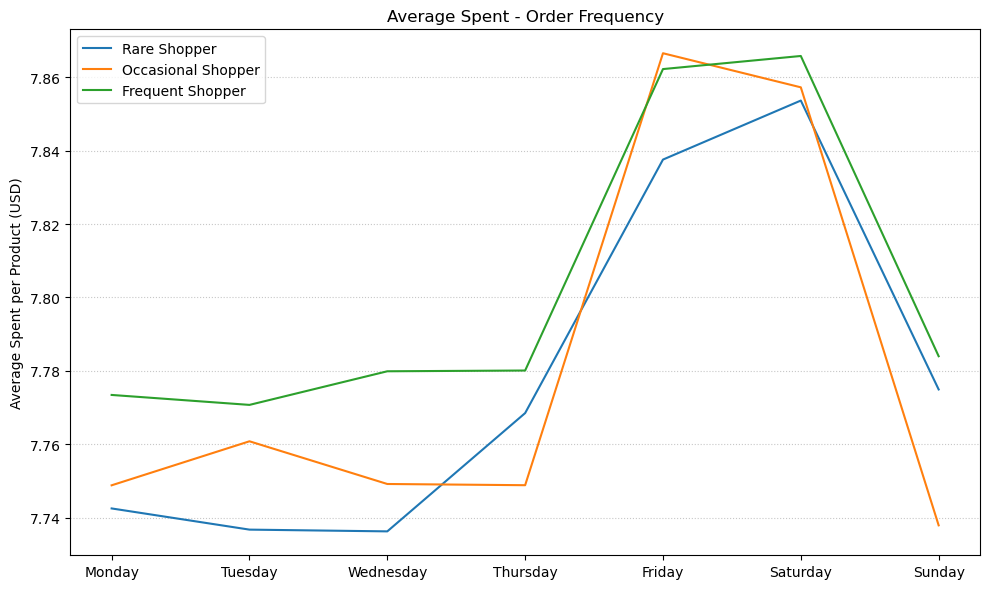

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.3.2_avg_price_frequency_dow.png


In [36]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_frequency_dow, x='order_day_of_week', y='prices', hue='frequency_flag')

# Formatting
plt.title('Average Spent - Order Frequency')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.3.2_avg_price_frequency_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.3.3. Hour of Day

In [37]:
# Calculate the avg spent per item
avg_price_frequency_hod = df.groupby(['order_hour_of_day', 'frequency_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_frequency_hod

,order_hour_of_day,frequency_flag,prices
0,0,Rare Shopper,7.771072
1,0,Occasional Shopper,7.824741
2,0,Frequent Shopper,7.829284
3,1,Rare Shopper,7.804943
4,1,Occasional Shopper,7.815520
...,...,...,...
67,22,Occasional Shopper,7.830913
68,22,Frequent Shopper,7.828799
69,23,Rare Shopper,7.761134
70,23,Occasional Shopper,7.798820


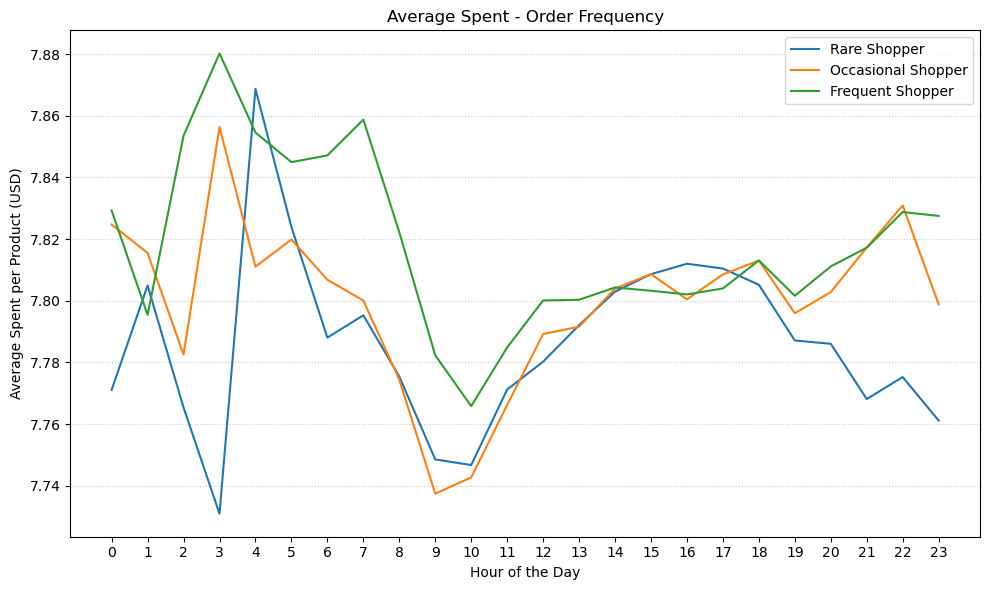

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.3.3_avg_price_frequency_hod.png


In [38]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_frequency_hod, x='order_hour_of_day', y='prices', hue='frequency_flag')

# Formatting
plt.title('Average Spent - Order Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_frequency_hod['order_hour_of_day'].unique(), labels=avg_price_frequency_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.3.3_avg_price_frequency_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.4. Loyalty Flag

### 4.4.1. Profile Overview

In [39]:
# Calucalte the avg spent per item per profile
avg_price_loyalty = df.groupby('loyalty_flag', as_index=False, observed=False)['prices'].mean()
avg_price_loyalty.columns = ['loyalty_flag', 'avg_price']
avg_price_loyalty

,loyalty_flag,avg_price
0,Low Loyalty,7.450273
1,Moderate Loyalty,7.901724
2,High Loyalty,8.167911


### 4.4.2. Days of Week

In [40]:
# Calculate the avg spent per item
avg_price_loyalty_dow = df.groupby(['order_day_of_week', 'loyalty_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_loyalty_dow

,order_day_of_week,loyalty_flag,prices
0,Monday,Low Loyalty,7.409244
1,Monday,Moderate Loyalty,7.863835
2,Monday,High Loyalty,8.149557
3,Tuesday,Low Loyalty,7.413182
4,Tuesday,Moderate Loyalty,7.854059
5,Tuesday,High Loyalty,8.141338
6,Wednesday,Low Loyalty,7.395194
7,Wednesday,Moderate Loyalty,7.843499
8,Wednesday,High Loyalty,8.151126
9,Thursday,Low Loyalty,7.413261


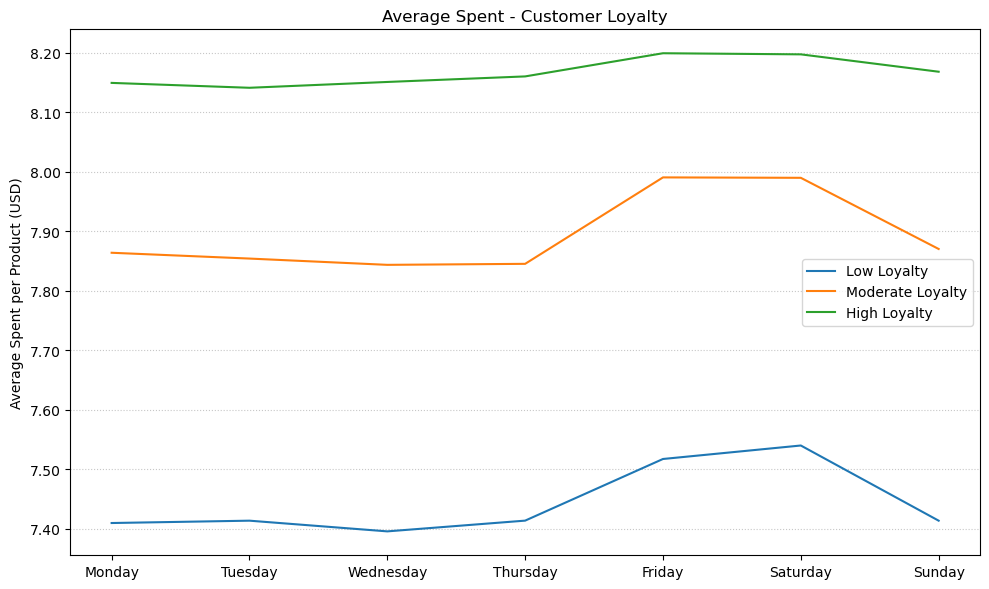

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.4.2_avg_price_loyalty_dow.png


In [41]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_loyalty_dow, x='order_day_of_week', y='prices', hue='loyalty_flag')

# Formatting
plt.title('Average Spent - Customer Loyalty')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.4.2_avg_price_loyalty_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.4.3. Hour of Day

In [42]:
# Calculate the avg spent per item
avg_price_loyalty_hod = df.groupby(['order_hour_of_day', 'loyalty_flag'], as_index=False, observed=False)['prices'].mean()
avg_price_loyalty_hod

,order_hour_of_day,loyalty_flag,prices
0,0,Low Loyalty,7.481902
1,0,Moderate Loyalty,7.932420
2,0,High Loyalty,8.206706
3,1,Low Loyalty,7.492358
4,1,Moderate Loyalty,7.953686
...,...,...,...
67,22,Moderate Loyalty,7.933228
68,22,High Loyalty,8.138557
69,23,Low Loyalty,7.451676
70,23,Moderate Loyalty,7.928794


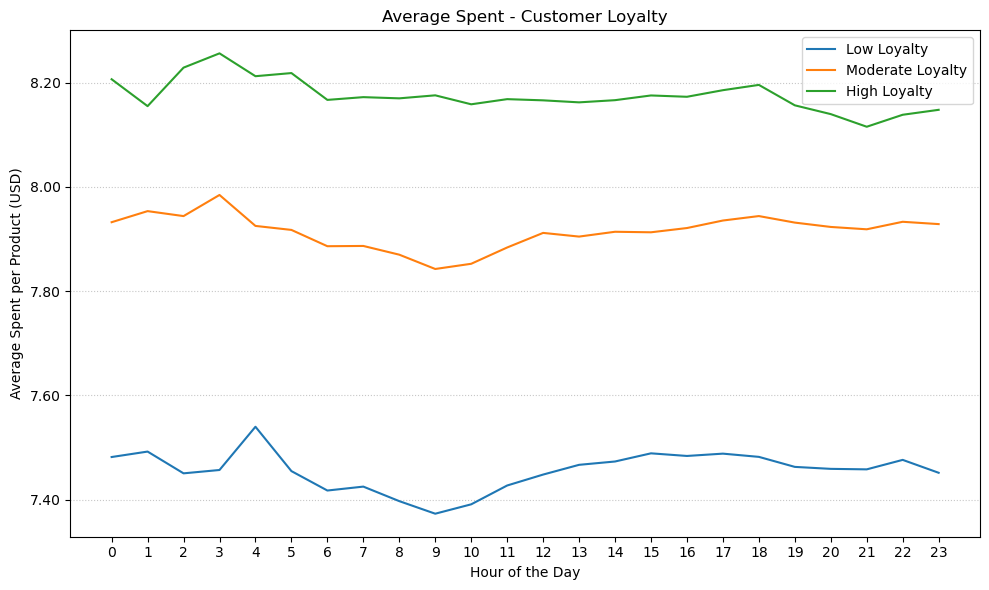

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.4.3_avg_price_loyalty_hod.png


In [43]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_loyalty_hod, x='order_hour_of_day', y='prices', hue='loyalty_flag')

# Formatting
plt.title('Average Spent - Customer Loyalty')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_loyalty_hod['order_hour_of_day'].unique(), labels=avg_price_loyalty_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.4.3_avg_price_loyalty_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.5. Region

### 4.5.1. Profile Overview

In [44]:
# Calucalte the avg spent per item per profile
avg_price_region = df.groupby('region', as_index=False, observed=False)['prices'].mean()
avg_price_region.columns = ['region', 'avg_price']
avg_price_region

,region,avg_price
0,West,7.791367
1,Midwest,7.793662
2,South,7.796020
3,Northeast,7.783402


### 4.5.2. Days of Week

In [45]:
# Calculate the avg spent per item
avg_price_region_dow = df.groupby(['order_day_of_week', 'region'], as_index=False, observed=False)['prices'].mean()
avg_price_region_dow

,order_day_of_week,region,prices
0,Monday,West,7.758717
1,Monday,Midwest,7.754852
2,Monday,South,7.757629
3,Monday,Northeast,7.747441
4,Tuesday,West,7.760140
5,Tuesday,Midwest,7.761234
6,Tuesday,South,7.767652
7,Tuesday,Northeast,7.736026
8,Wednesday,West,7.753267
9,Wednesday,Midwest,7.755009


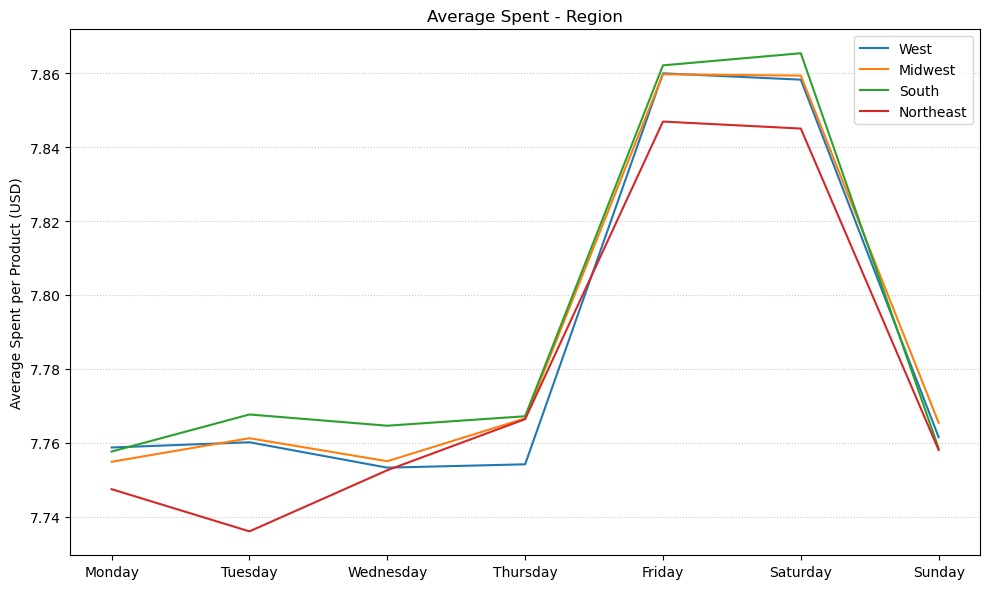

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.5.2_avg_price_region_dow.png


In [46]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_region_dow, x='order_day_of_week', y='prices', hue='region')

# Formatting
plt.title('Average Spent - Region')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.5.2_avg_price_region_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.5.3. Hour of Day

In [47]:
# Calculate the avg spent per item
avg_price_region_hod = df.groupby(['order_hour_of_day', 'region'], as_index=False, observed=False)['prices'].mean()
avg_price_region_hod

,order_hour_of_day,region,prices
0,0,West,7.820537
1,0,Midwest,7.833729
2,0,South,7.804301
3,0,Northeast,7.785665
4,1,West,7.830801
...,...,...,...
91,22,Northeast,7.804512
92,23,West,7.794092
93,23,Midwest,7.790996
94,23,South,7.821710


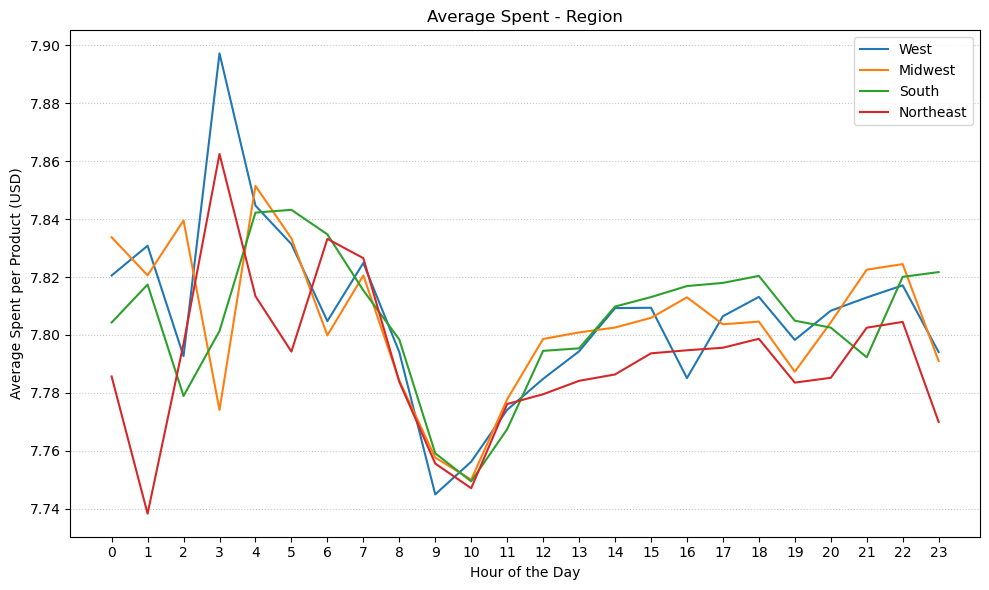

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.5.3_avg_price_region_hod.png


In [48]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_region_hod, x='order_hour_of_day', y='prices', hue='region')

# Formatting
plt.title('Average Spent - Region')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_region_hod['order_hour_of_day'].unique(), labels=avg_price_region_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.5.3_avg_price_region_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.6. Age Profile

### 4.6.1. Profile Overview

In [49]:
# Calucalte the avg spent per item per profile
avg_price_age = df.groupby('age_profile', as_index=False, observed=False)['prices'].mean()
avg_price_age.columns = ['age_profile', 'avg_price']
avg_price_age

,age_profile,avg_price
0,Young Adult,7.786871
1,Adult,7.790901
2,Middle Aged,7.792632
3,Senior,7.795348


### 4.6.2. Days of Week

In [50]:
# Calculate the avg spent per item
avg_price_age_dow = df.groupby(['order_day_of_week', 'age_profile'], as_index=False, observed=False)['prices'].mean()
avg_price_age_dow

,order_day_of_week,age_profile,prices
0,Monday,Young Adult,7.745507
1,Monday,Adult,7.757485
2,Monday,Middle Aged,7.753574
3,Monday,Senior,7.760208
4,Tuesday,Young Adult,7.756109
5,Tuesday,Adult,7.755811
6,Tuesday,Middle Aged,7.762931
7,Tuesday,Senior,7.758108
8,Wednesday,Young Adult,7.744977
9,Wednesday,Adult,7.761819


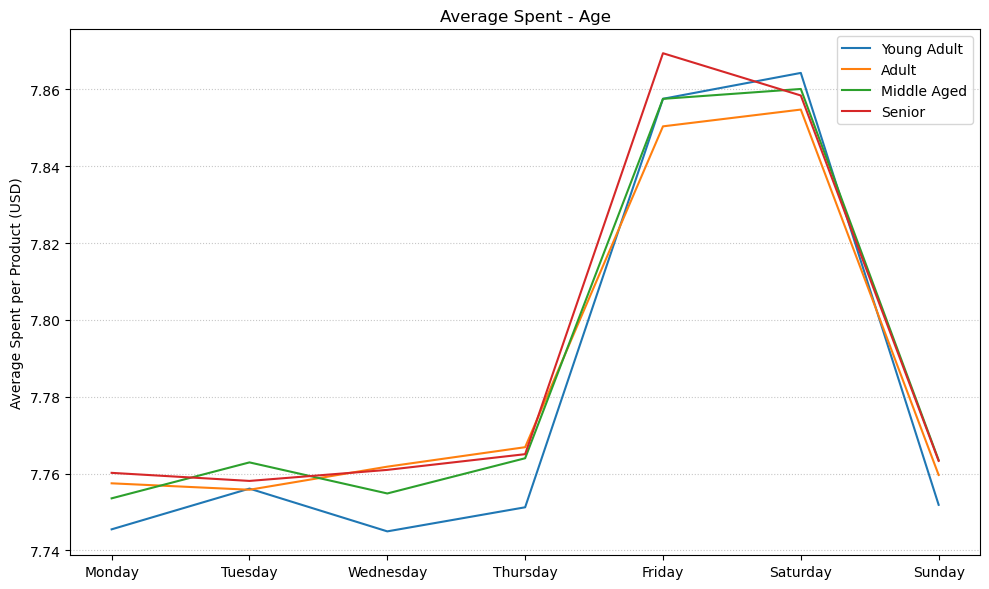

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.6.2_avg_price_age_dow.png


In [51]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_age_dow, x='order_day_of_week', y='prices', hue='age_profile')

# Formatting
plt.title('Average Spent - Age')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.6.2_avg_price_age_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.6.3. Hour of Day

In [52]:
# Calculate the avg spent per item
avg_price_age_hod = df.groupby(['order_hour_of_day', 'age_profile'], as_index=False, observed=False)['prices'].mean()
avg_price_age_hod

,order_hour_of_day,age_profile,prices
0,0,Young Adult,7.786263
1,0,Adult,7.810258
2,0,Middle Aged,7.829023
3,0,Senior,7.806451
4,1,Young Adult,7.847029
...,...,...,...
91,22,Senior,7.822009
92,23,Young Adult,7.777904
93,23,Adult,7.774098
94,23,Middle Aged,7.840794


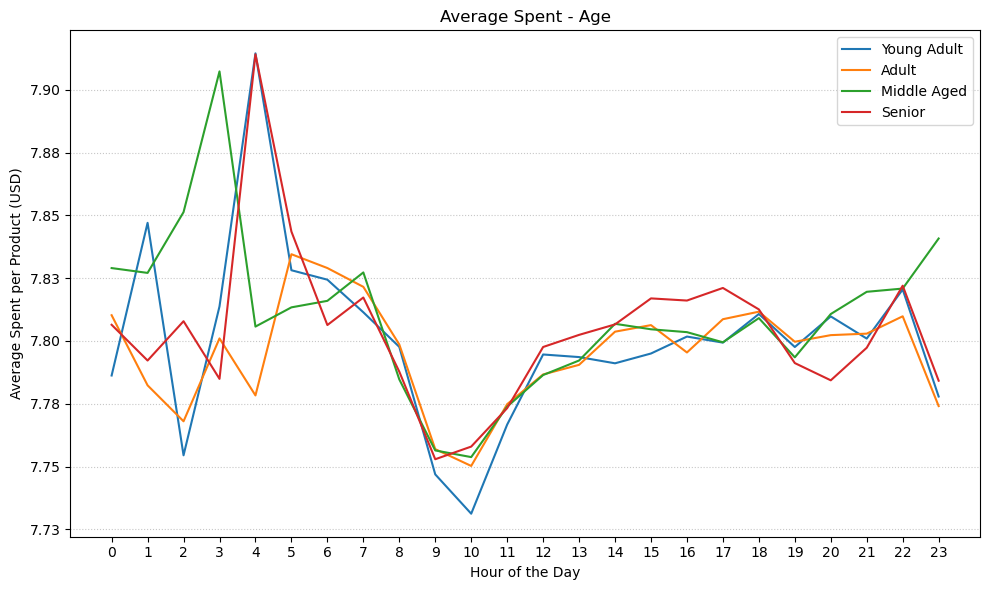

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.6.3_avg_price_age_hod.png


In [53]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_age_hod, x='order_hour_of_day', y='prices', hue='age_profile')

# Formatting
plt.title('Average Spent - Age')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_age_hod['order_hour_of_day'].unique(), labels=avg_price_age_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.6.3_avg_price_age_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.7. Income Profile

### 4.7.1. Profile Overview

In [54]:
# Calucalte the avg spent per item per profile
avg_price_income = df.groupby('income_profile', as_index=False, observed=False)['prices'].mean()
avg_price_income.columns = ['income_profile', 'avg_price']
avg_price_income

,income_profile,avg_price
0,Low Income,7.232853
1,Middle Income,7.961418
2,High Income,7.960407


### 4.7.2. Days of Week

In [55]:
# Calculate the avg spent per item
avg_price_income_dow = df.groupby(['order_day_of_week', 'income_profile'], as_index=False, observed=False)['prices'].mean()
avg_price_income_dow

,order_day_of_week,income_profile,prices
0,Monday,Low Income,7.159660
1,Monday,Middle Income,7.944750
2,Monday,High Income,7.949863
3,Tuesday,Low Income,7.164604
4,Tuesday,Middle Income,7.947927
5,Tuesday,High Income,7.943762
6,Wednesday,Low Income,7.167093
7,Wednesday,Middle Income,7.943118
8,Wednesday,High Income,7.945247
9,Thursday,Low Income,7.184627


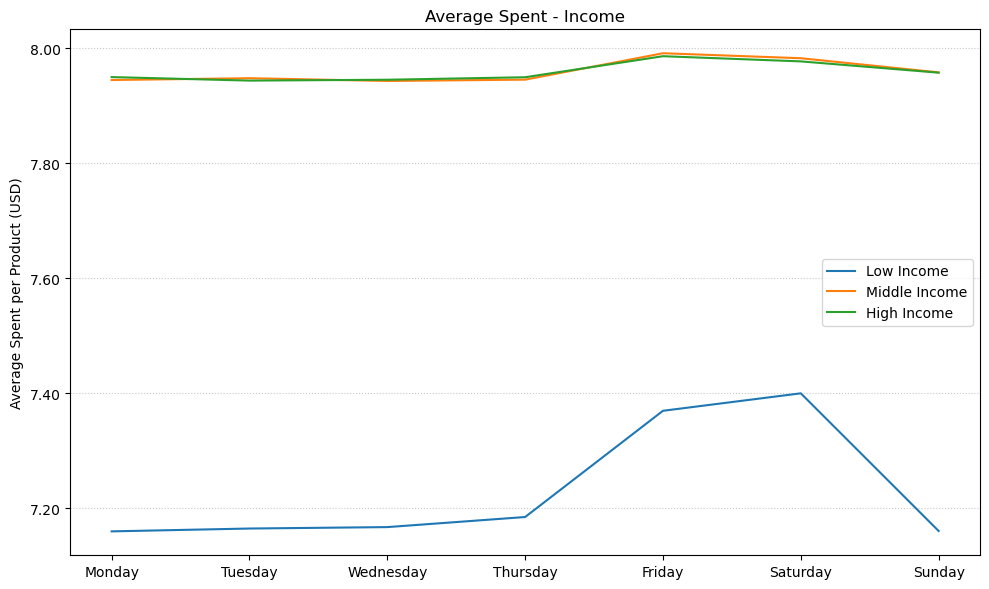

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.7.2_avg_price_income_dow.png


In [56]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_income_dow, x='order_day_of_week', y='prices', hue='income_profile')

# Formatting
plt.title('Average Spent - Income')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.7.2_avg_price_income_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.7.3. Hour of Day

In [57]:
# Calculate the avg spent per item
avg_price_income_hod = df.groupby(['order_hour_of_day', 'income_profile'], as_index=False, observed=False)['prices'].mean()
avg_price_income_hod

,order_hour_of_day,income_profile,prices
0,0,Low Income,7.282354
1,0,Middle Income,7.967215
2,0,High Income,7.963428
3,1,Low Income,7.294518
4,1,Middle Income,7.968626
...,...,...,...
67,22,Middle Income,7.950666
68,22,High Income,7.953650
69,23,Low Income,7.247565
70,23,Middle Income,7.959878


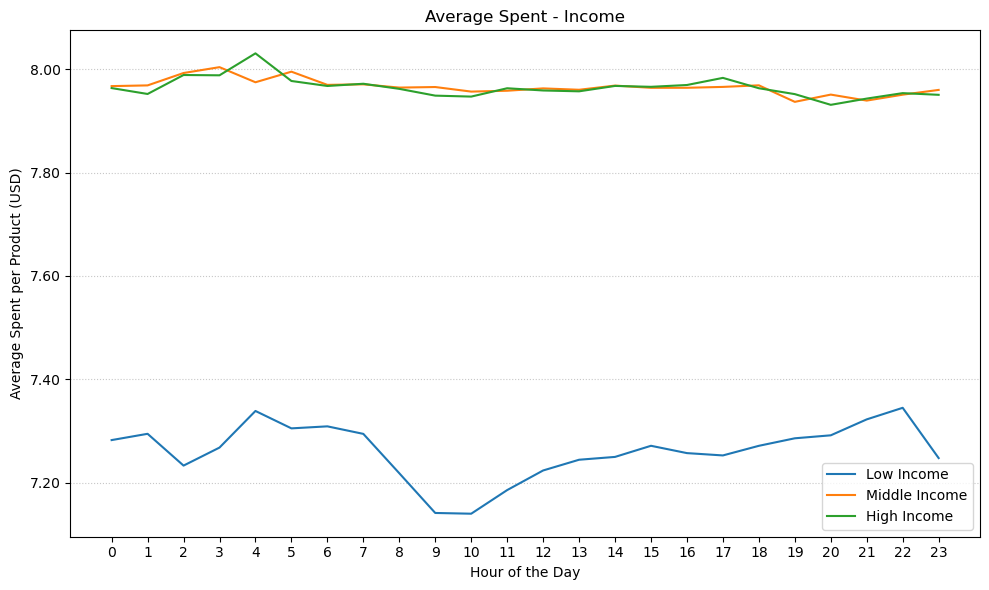

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.7.3_avg_price_income_hod.png


In [58]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_income_hod, x='order_hour_of_day', y='prices', hue='income_profile')

# Formatting
plt.title('Average Spent - Income')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_income_hod['order_hour_of_day'].unique(), labels=avg_price_income_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.7.3_avg_price_income_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

## 4.8. Family Status

### 4.8.1. Profile Overview

In [59]:
# Calucalte the avg spent per item per profile
avg_price_family = df.groupby('family_status', as_index=False, observed=False)['prices'].mean()
avg_price_family.columns = ['family_status', 'avg_price']
avg_price_family

,family_status,avg_price
0,Single Adult,7.790959
1,Young Parent,7.801608
2,Family,7.791784


### 4.8.2. Days of Week

In [60]:
# Calculate the avg spent per item
avg_price_family_dow = df.groupby(['order_day_of_week', 'family_status'], as_index=False, observed=False)['prices'].mean()
avg_price_family_dow

,order_day_of_week,family_status,prices
0,Monday,Single Adult,7.755119
1,Monday,Young Parent,7.761333
2,Monday,Family,7.755164
3,Tuesday,Single Adult,7.759796
4,Tuesday,Young Parent,7.779329
5,Tuesday,Family,7.756842
6,Wednesday,Single Adult,7.759619
7,Wednesday,Young Parent,7.773004
8,Wednesday,Family,7.755445
9,Thursday,Single Adult,7.760826


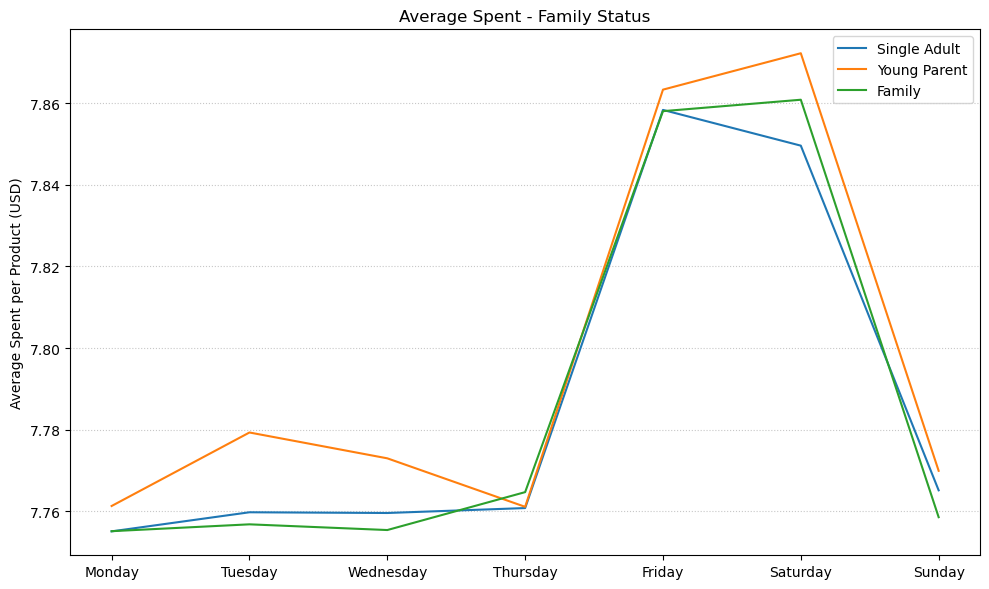

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.8.2_avg_price_family_dow.png


In [61]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_family_dow, x='order_day_of_week', y='prices', hue='family_status')

# Formatting
plt.title('Average Spent - Family Status')
plt.xlabel('')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.8.2_avg_price_family_dow.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")

### 4.8.3. Hour of Day

In [62]:
# Calculate the avg spent per item
avg_price_family_hod = df.groupby(['order_hour_of_day', 'family_status'], as_index=False, observed=False)['prices'].mean()
avg_price_family_hod

,order_hour_of_day,family_status,prices
0,0,Single Adult,7.813211
1,0,Young Parent,7.804338
2,0,Family,7.812140
3,1,Single Adult,7.778932
4,1,Young Parent,7.820753
...,...,...,...
67,22,Young Parent,7.836436
68,22,Family,7.813517
69,23,Single Adult,7.797293
70,23,Young Parent,7.821483


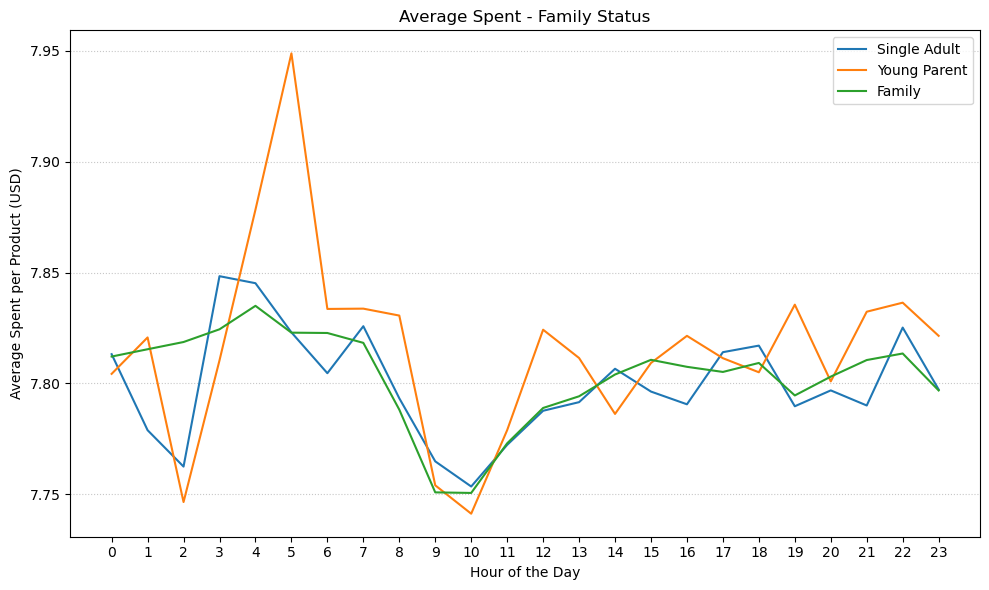

Chart successfully saved at: /Users/davidgriesel/Documents/GitHub/202409_OGS/04 - Analysis/Visualisations/Spending/4.8.3_avg_price_family_hod.png


In [63]:
# Create the line plot
plt.figure(figsize=(10, 6))

# Ensure consistent colors by passing `palette=color_mapping`
sns.lineplot(data=avg_price_family_hod, x='order_hour_of_day', y='prices', hue='family_status')

# Formatting
plt.title('Average Spent - Family Status')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spent per Product (USD)')
plt.legend(title='')

# Ensure all unique categorical values appear on the x-axis
plt.xticks(ticks=avg_price_family_hod['order_hour_of_day'].unique(), labels=avg_price_family_hod['order_hour_of_day'].unique())

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.2f}'))

# Add gridlines corresponding to y-axis values
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure before displaying
save_path = os.path.join(path, '04 - Analysis/Visualisations/Spending', '4.8.3_avg_price_family_hod.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Print confirmation message
print(f"Chart successfully saved at: {save_path}")